In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

In [2]:
def draw(G, pos, measures, measure_name):
    
    plt.figure(figsize=(20, 20))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name, fontsize=30)
    # plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [3]:
def dict_sort_by_value(dict_input):
    '''
    输入字典，输出按值排序的字典
    '''
    return sorted(dict_input.items(),key=lambda x : x[1], reverse=True)   

In [4]:
# 上海地铁站点连接表
# df = pd.read_csv('shanghai_subway.csv')

# 北京地铁站点连接表
df = pd.read_csv('beijing_subway.csv')

In [5]:
df

,前一站,后一站,地铁线,时间（分钟）
0,古城,八角游乐园,1,3
1,八角游乐园,八宝山,1,3
2,八宝山,玉泉路,1,3
3,玉泉路,五棵松,1,2
4,五棵松,万寿路,1,3
...,...,...,...,...
421,东直门,三元桥,首都机场线,3
422,三元桥,3号航站楼,首都机场线,13
423,3号航站楼,2号航站楼,首都机场线,14
424,大兴机场,大兴新城,大兴机场线,12


In [6]:
# 创建无向图
G = nx.Graph()

## 从连接表创建图

In [7]:
for idx, row in df.iterrows(): # 遍历表格的每一行
    G.add_edges_from([(row['前一站'], row['后一站'])], line=row['地铁线'], time=row['时间（分钟）'])

## 检查是否导入成功

In [8]:
# 节点个数
len(G)

365

In [9]:
# 节点个数
len(G.nodes)

365

In [10]:
# 连接个数
len(G.edges)

423

In [14]:
# 查看连接属性特征
G.edges[('阜通', '望京')]

{'line': '14', 'time': 2}

## 可视化

In [15]:
# 节点排版布局-默认弹簧布局
pos = nx.spring_layout(G, seed=123)

# 节点排版布局-每个节点单独设置坐标
# pos = {1: [0.1, 0.9], 2: [0.4, 0.8], 3: [0.8, 0.9], 4: [0.15, 0.55],
#         5: [0.5,  0.5], 6: [0.8,  0.5], 7: [0.22, 0.3], 8: [0.30, 0.27],
#         9: [0.38, 0.24], 10: [0.7,  0.3], 11: [0.75, 0.35]}

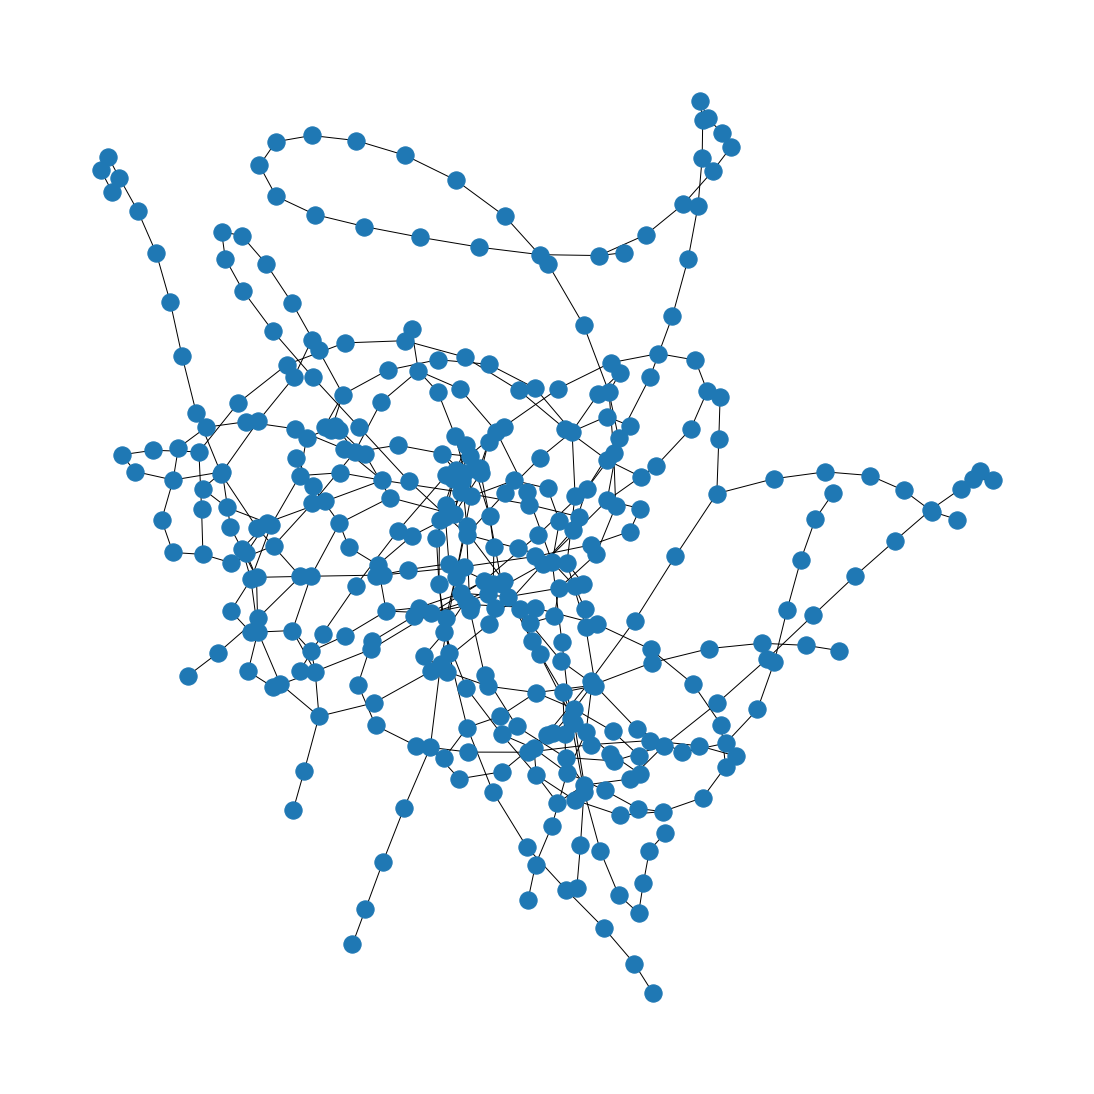

In [16]:
plt.figure(figsize=(15,15))
nx.draw(G, pos=pos)

## Shortest Path 最短路径

In [17]:
# 任意两节点之间是否存在路径
nx.has_path(G, source='北沙滩', target='郭庄子')

True

In [18]:
# 任意两节点之间的最短路径
nx.shortest_path(G, source='北沙滩', target='郭庄子', weight='time')

['北沙滩',
 '奥林匹克公园',
 '奥体中心',
 '北土城',
 '健德门',
 '牡丹园',
 '北太平庄',
 '积水潭',
 '平安里',
 '车公庄',
 '车公庄西',
 '白石桥南',
 '白堆子',
 '军事博物馆',
 '公主坟',
 '莲花桥',
 '六里桥',
 '七里庄',
 '大井',
 '郭庄子']

In [19]:
# 任意两节点之间的最短路径长度
nx.shortest_path_length(G, source='北沙滩', target='郭庄子', weight='time')

47

In [20]:
# 全图平均最短路径
nx.average_shortest_path_length(G, weight='time')

41.17386722866175

In [21]:
# 某一站去其他站的最短路径
nx.single_source_shortest_path(G, source='北沙滩')

{'北沙滩': ['北沙滩'],
 '奥林匹克公园': ['北沙滩', '奥林匹克公园'],
 '六道口': ['北沙滩', '六道口'],
 '森林公园南门': ['北沙滩', '奥林匹克公园', '森林公园南门'],
 '奥体中心': ['北沙滩', '奥林匹克公园', '奥体中心'],
 '安立路': ['北沙滩', '奥林匹克公园', '安立路'],
 '清华东路西口': ['北沙滩', '六道口', '清华东路西口'],
 '林萃桥': ['北沙滩', '奥林匹克公园', '森林公园南门', '林萃桥'],
 '北土城': ['北沙滩', '奥林匹克公园', '奥体中心', '北土城'],
 '大屯路东': ['北沙滩', '奥林匹克公园', '安立路', '大屯路东'],
 '永泰庄': ['北沙滩', '奥林匹克公园', '森林公园南门', '林萃桥', '永泰庄'],
 '安华桥': ['北沙滩', '奥林匹克公园', '奥体中心', '北土城', '安华桥'],
 '健德门': ['北沙滩', '奥林匹克公园', '奥体中心', '北土城', '健德门'],
 '安贞门': ['北沙滩', '奥林匹克公园', '奥体中心', '北土城', '安贞门'],
 '惠新西街北口': ['北沙滩', '奥林匹克公园', '安立路', '大屯路东', '惠新西街北口'],
 '北苑路北': ['北沙滩', '奥林匹克公园', '安立路', '大屯路东', '北苑路北'],
 '关庄': ['北沙滩', '奥林匹克公园', '安立路', '大屯路东', '关庄'],
 '西小口': ['北沙滩', '奥林匹克公园', '森林公园南门', '林萃桥', '永泰庄', '西小口'],
 '安德里北街': ['北沙滩', '奥林匹克公园', '奥体中心', '北土城', '安华桥', '安德里北街'],
 '牡丹园': ['北沙滩', '奥林匹克公园', '奥体中心', '北土城', '健德门', '牡丹园'],
 '惠新西街南口': ['北沙滩', '奥林匹克公园', '奥体中心', '北土城', '安贞门', '惠新西街南口'],
 '立水桥南': ['北沙滩', '奥林匹克公园', '安立路', '大屯路东', '北苑路北', '立水桥南'],
 '望京西':

In [23]:
# 某一站去其他站的最短路径长度
nx.single_source_shortest_path_length(G, source='北沙滩')

{'北沙滩': 0,
 '六道口': 1,
 '奥林匹克公园': 1,
 '安立路': 2,
 '奥体中心': 2,
 '清华东路西口': 2,
 '森林公园南门': 2,
 '林萃桥': 3,
 '北土城': 3,
 '大屯路东': 3,
 '安贞门': 4,
 '安华桥': 4,
 '惠新西街北口': 4,
 '健德门': 4,
 '永泰庄': 4,
 '关庄': 4,
 '北苑路北': 4,
 '安德里北街': 5,
 '牡丹园': 5,
 '望京西': 5,
 '立水桥南': 5,
 '西小口': 5,
 '惠新西街南口': 5,
 '和平西桥': 6,
 '鼓楼大街': 6,
 '北苑': 6,
 '立水桥': 6,
 '望京': 6,
 '北太平庄': 6,
 '育新': 6,
 '芍药居': 6,
 '西土城': 6,
 '知春路': 7,
 '望京东': 7,
 '天通苑南': 7,
 '积水潭': 7,
 '霍营': 7,
 '和平里北街': 7,
 '安定门': 7,
 '阜通': 7,
 '什刹海': 7,
 '太阳宫': 7,
 '东湖渠': 7,
 '光熙门': 7,
 '柳芳': 8,
 '来广营': 8,
 '大钟寺': 8,
 '平安里': 8,
 '天通苑': 8,
 '回龙观': 8,
 '三元桥': 8,
 '南锣鼓巷': 8,
 '雍和宫': 8,
 '望京南': 8,
 '五道口': 8,
 '回龙观东大街': 8,
 '崔各庄': 8,
 '知春里': 8,
 '善各庄': 9,
 '亮马桥': 9,
 '东四': 9,
 '北新桥': 9,
 '海淀黄庄': 9,
 '中国美术馆': 9,
 '上地': 9,
 '平西府': 9,
 '北海北': 9,
 '车公庄': 9,
 '东直门': 9,
 '新街口': 9,
 '3号航站楼': 9,
 '西四': 9,
 '马泉营': 9,
 '将台': 9,
 '太平桥': 9,
 '西直门': 9,
 '天通苑北': 9,
 '龙泽': 9,
 '动物园': 10,
 '孙河': 10,
 '人民大学': 10,
 '金鱼胡同': 10,
 '灯市口': 10,
 '育知路': 10,
 '东风北桥': 10,
 '灵境胡同': 10,
 '张自忠路': 10,
 '朝阳门

## 地铁导航系统

In [24]:
# 指定起始站和终点站
A_station = '北沙滩'
B_station = '郭庄子'

# 获取最短路径
shortest_path_list = nx.shortest_path(G, source=A_station, target=B_station, weight='time')

for i in range(len(shortest_path_list)-1):
    previous_station = shortest_path_list[i]
    next_station = shortest_path_list[i+1]
    line_id = G.edges[(previous_station, next_station)]['line'] # 地铁线编号
    time = G.edges[(previous_station, next_station)]['time']    # 时间
    print('{}--->{} {}号线 {}分钟'.format(previous_station, next_station, line_id, time)) # 输出结果
    
# 最短路径长度
print('共计 {} 分钟'.format(nx.shortest_path_length(G, source=A_station, target=B_station, weight='time')))

北沙滩--->奥林匹克公园 15号线 3分钟
奥林匹克公园--->奥体中心 8号线 2分钟
奥体中心--->北土城 8号线 2分钟
北土城--->健德门 10号线 2分钟
健德门--->牡丹园 10号线 2分钟
牡丹园--->北太平庄 19号线 1分钟
北太平庄--->积水潭 19号线 3分钟
积水潭--->平安里 19号线 3分钟
平安里--->车公庄 6号线 2分钟
车公庄--->车公庄西 6号线 2分钟
车公庄西--->白石桥南 6号线 3分钟
白石桥南--->白堆子 9号线 2分钟
白堆子--->军事博物馆 9号线 3分钟
军事博物馆--->公主坟 1号线 3分钟
公主坟--->莲花桥 10号线 2分钟
莲花桥--->六里桥 10号线 3分钟
六里桥--->七里庄 9号线 3分钟
七里庄--->大井 14号线 3分钟
大井--->郭庄子 14号线 3分钟
共计 47 分钟


## Node Degree

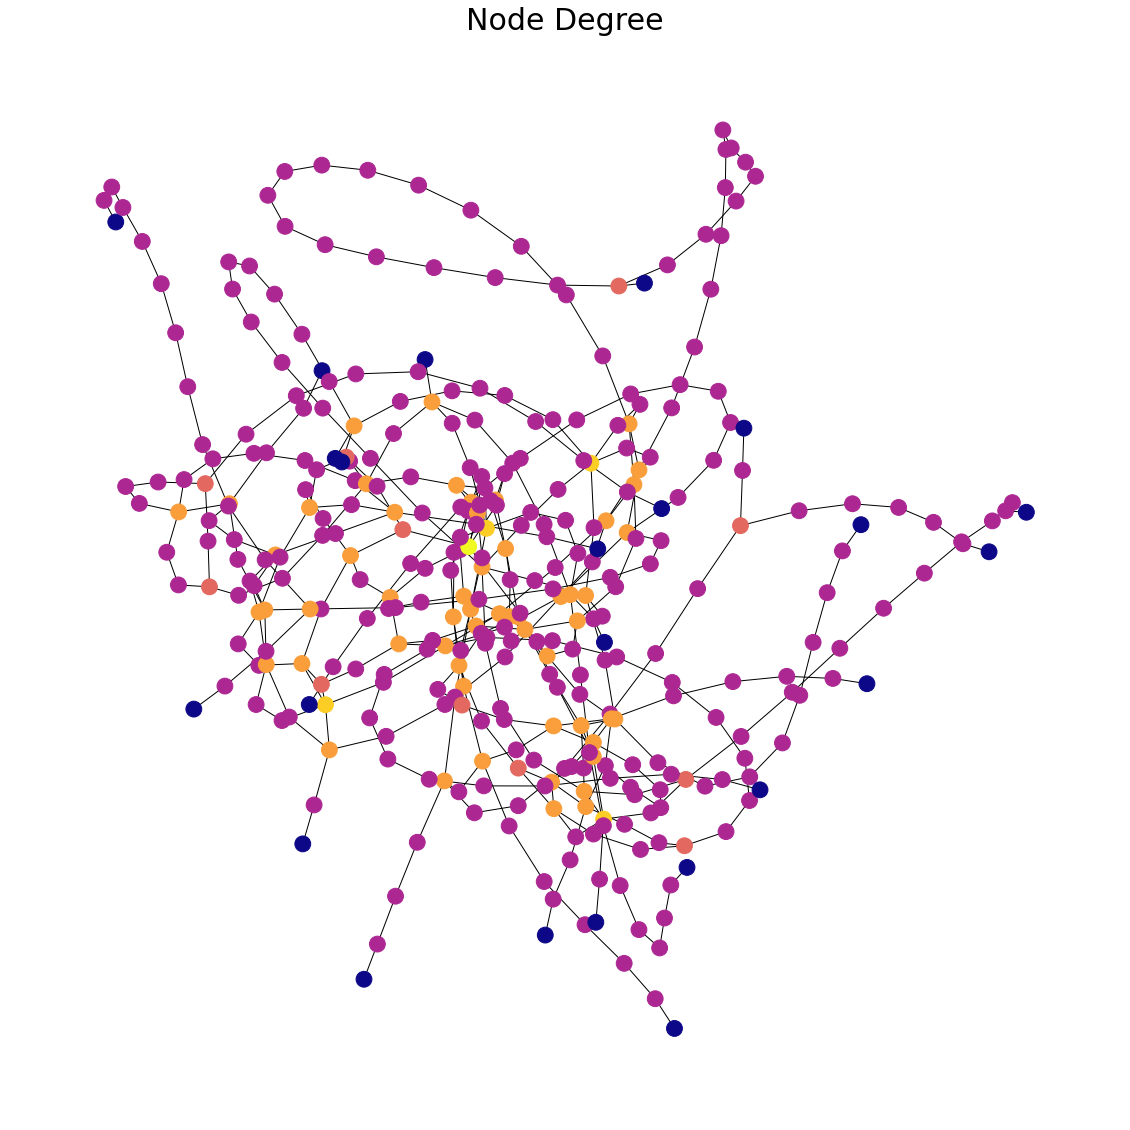

In [25]:
draw(G, pos, dict(G.degree()), 'Node Degree')

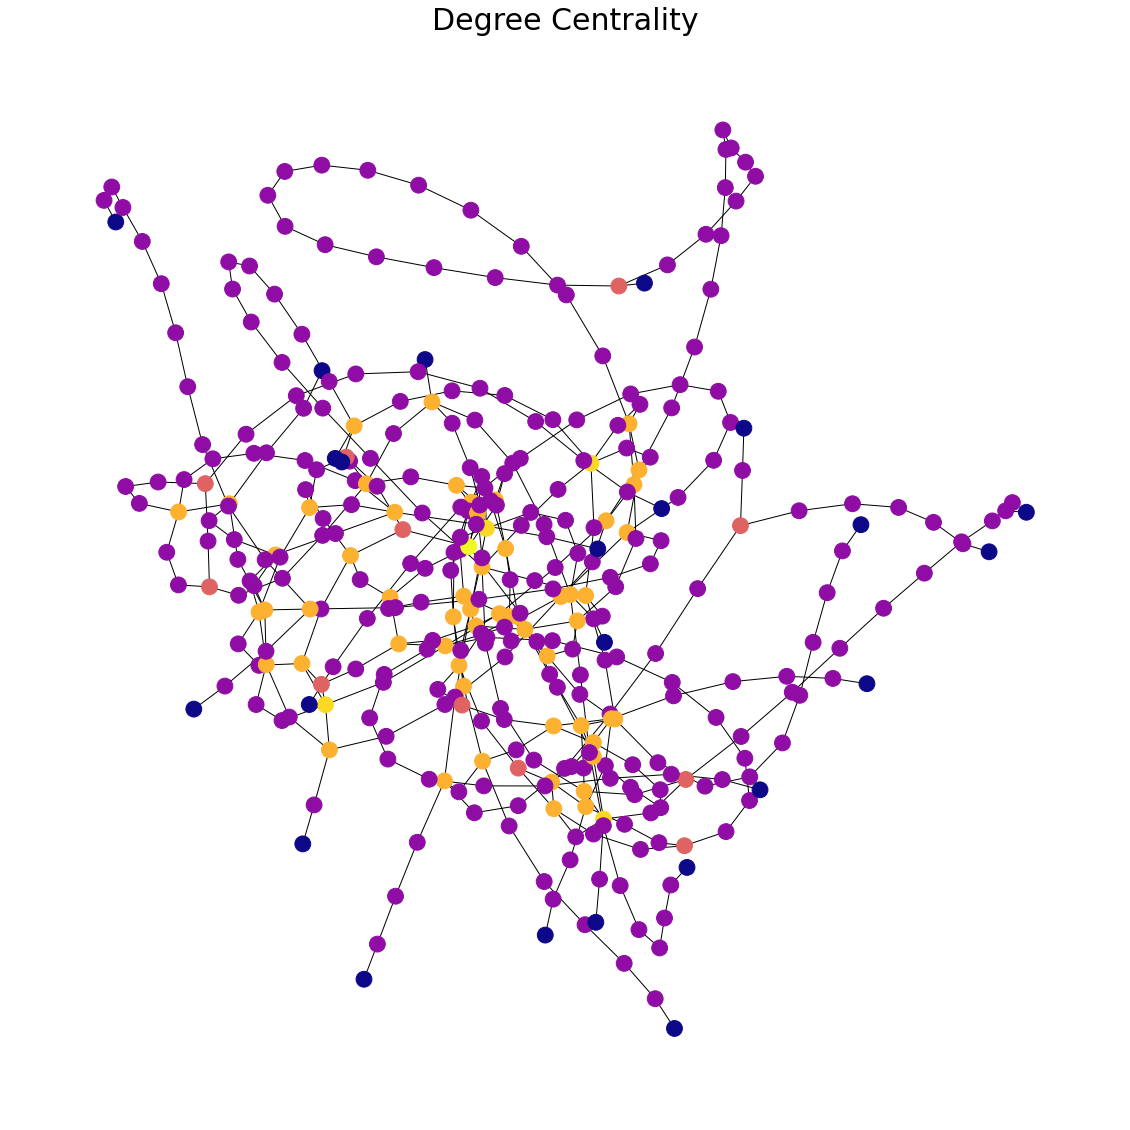

In [26]:
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')